In [1]:
import json
from pathlib import Path
import numpy as np

from plot_utils import plot_sample, plot_sample_from_rttm

/home/heh/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
[NeMo W 2022-10-27 15:49:52 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-10-27 15:49:52 experimental:27] Module <class 'nemo.collections.nlp.data.language_modeling.megatron.megatron_batch_samplers.MegatronPretrainingRandomBatchSampler'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-10-27 15:49:52 experimental:27] Module <class 'nemo.collections.nlp.models.text_normalization_as_tagging.thutmose_tagger.ThutmoseTaggerModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.


In [2]:
# root_dir = Path("../nemo_experiments/Stream_VAD/drc_Multilang_sgdlr1e-3_wd1e-4_augx_b128_gacc1_ep50_w8/frame_vad_output/")
root_dir = Path("../nemo_experiments/checkpoints/")
test_folder = root_dir / Path("vad_output_ch120_CH109_eval_10ms")


manifest_file = test_folder / Path("manifest_vad_input.json")
pred_frame_dir = test_folder / Path("frame_predictions")
gt_frame_dir = test_folder / Path("frames_groundtruth")

In [3]:
def load_manifest(manifest_file):
    results = {}
    with Path(manifest_file).open("r") as fin:
        for line in fin.readlines():
            item = json.loads(line.strip())
            audio_file = item["audio_filepath"]
            key = Path(audio_file).stem
            results[key] = audio_file
    return results

def load_frames(data_dir):
    results = {}
    for frames_file in Path(data_dir).glob("*.frame"):
        key = frames_file.stem
        results[key] = str(frames_file)
    return results


In [9]:
audio_dict = load_manifest(manifest_file)
pred_frame_dict = load_frames(pred_frame_dir)
gt_frame_dict = load_frames(gt_frame_dir)

In [22]:
post_args = {
    "onset": 0.5, # onset threshold for detecting the beginning and end of a speech
    "offset": 0.8, # offset threshold for detecting the end of a speech.
    "pad_onset": 0.0, # adding durations before each speech segment
    "pad_offset": 0.0, # adding durations after each speech segment
    "min_duration_on": 0.0, # threshold for small non_speech deletion
    "min_duration_off": 0.2, # threshold for short speech segment deletion
    "filter_speech_first": True, 
    "frame_length_in_sec": 0.01
}
duration = None

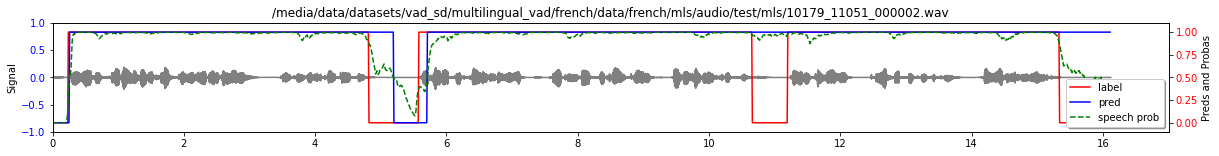

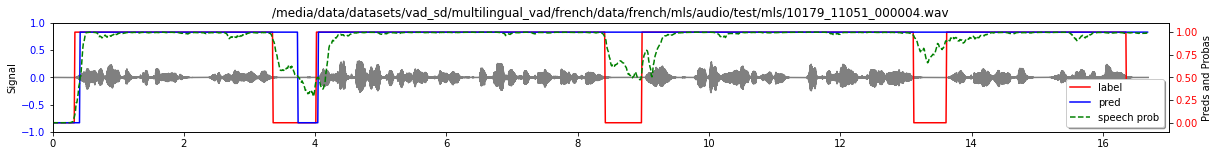

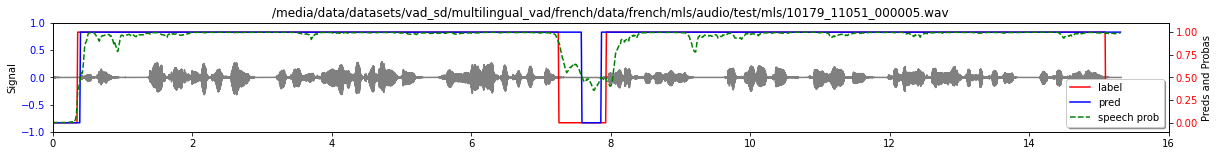

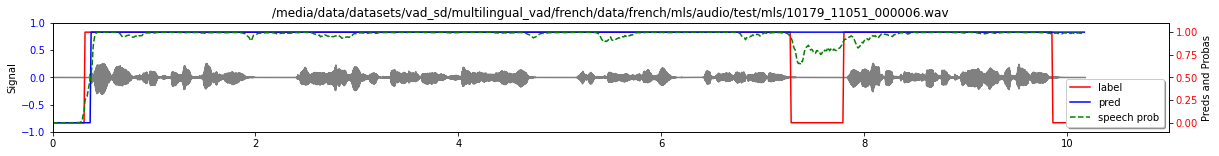

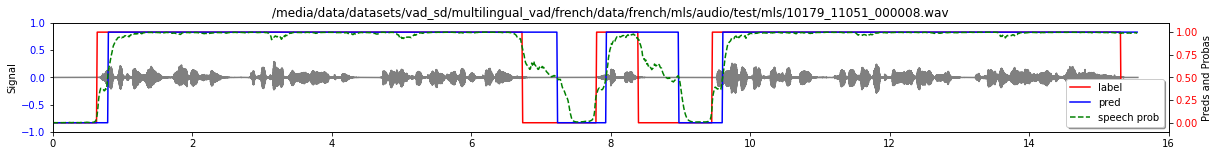

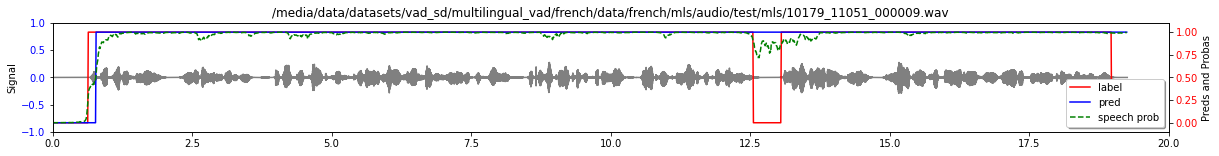

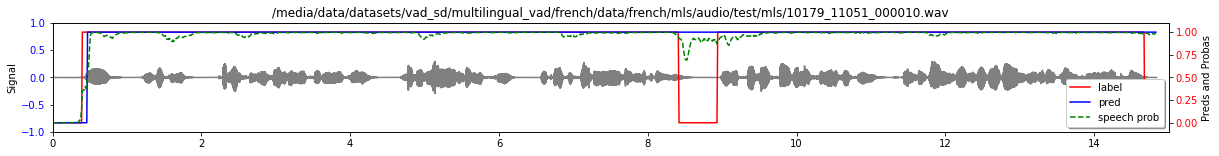

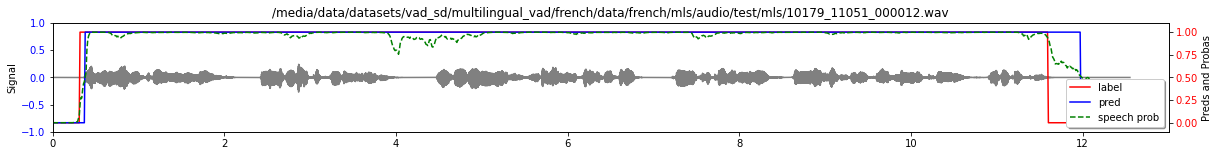

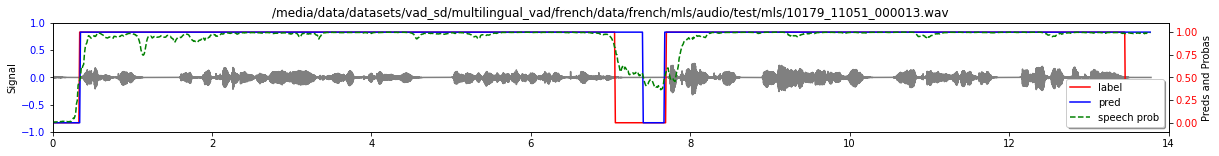

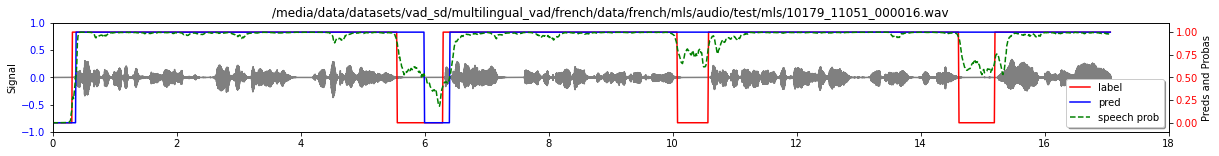

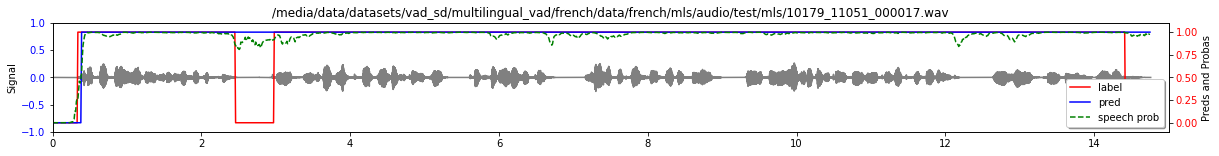

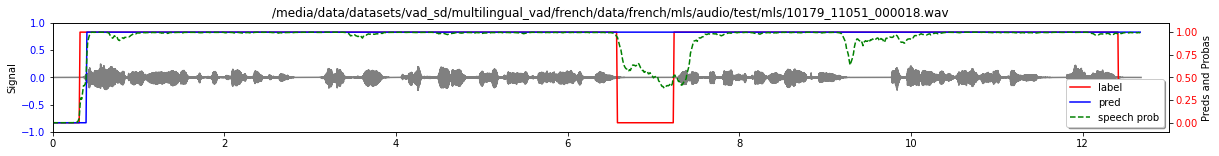

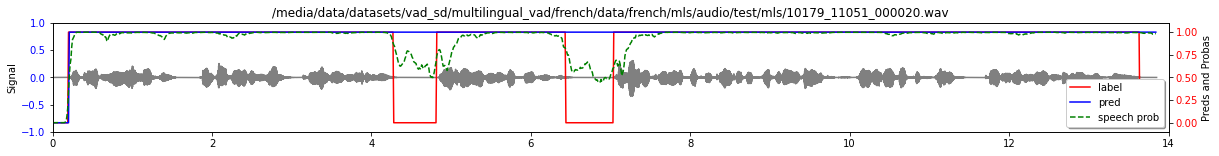

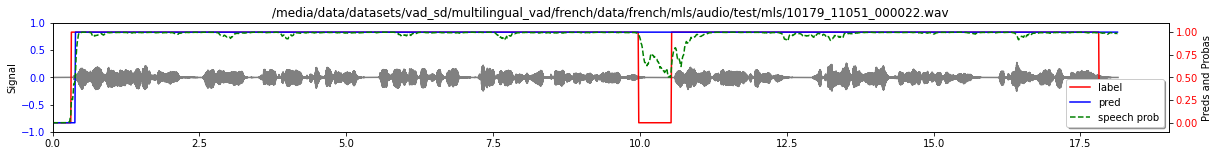

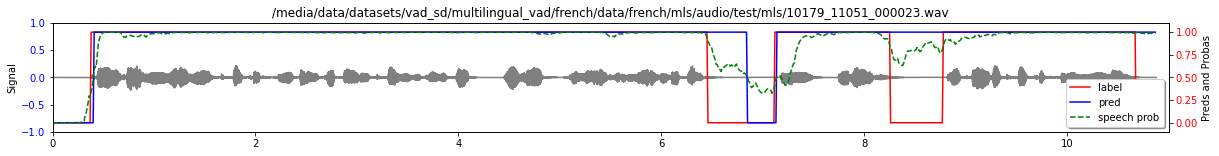

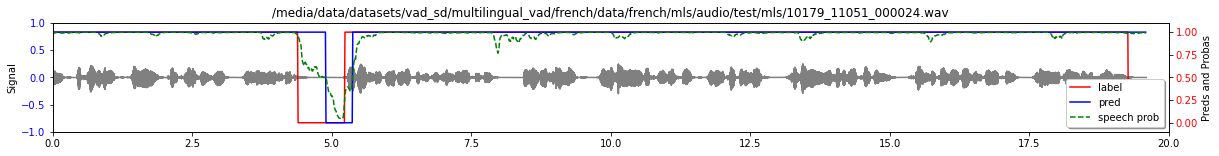

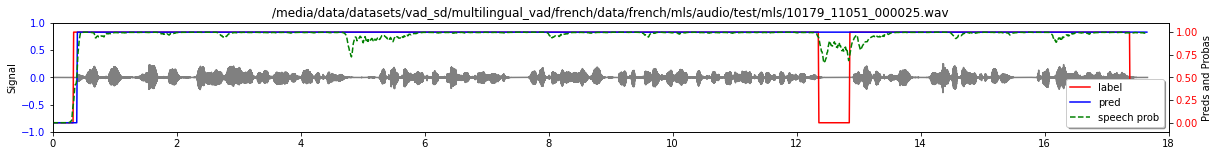

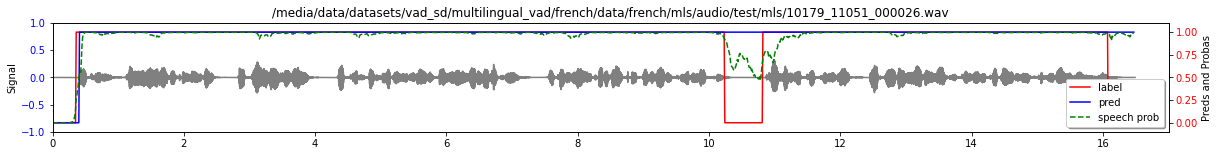

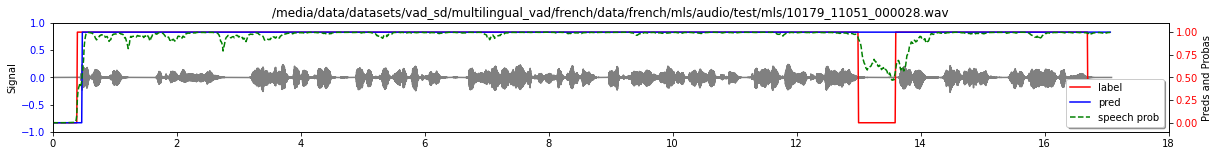

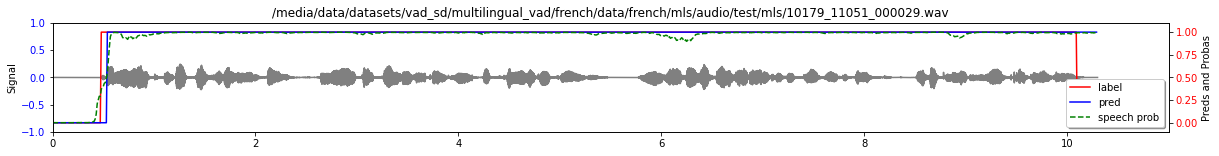

In [23]:
num_samples = 20
all_keys = sorted(list(audio_dict.keys()))
keys_sampled = all_keys[:num_samples] #np.random.choice(all_keys, num_samples)
for key in keys_sampled:
    plot_sample(audio_dict[key], pred_frame_dict[key], gt_frame_dict[key], per_args=post_args, duration=duration)
    


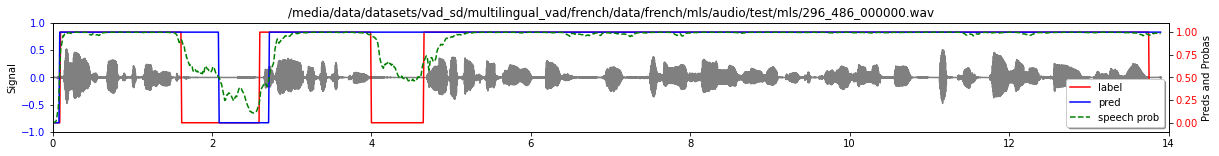

<Figure size 432x288 with 0 Axes>

In [11]:
key = "296_486_000000"
plot_sample(audio_dict[key], pred_frame_dict[key], gt_frame_dict[key], per_args=post_args)

In [16]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, List, Optional


def plot_sample_from_manifest(data: Dict, max_duration: Optional[float] = None, save_path: str = "", repeat: int = 1):
    audio_file = data['audio_filepath']
    labels = [float(x) for x in data['label'].split()]
    
    if repeat > 1:
        labels = np.repeat(labels, repeat)
    
    duration = data['duration']
    offset = data['offset']

    if max_duration:
        duration = min(duration, max_duration)

    plt.figure(figsize=[20, 2])
    UNIT_FRAME_LEN = 0.01

    audio, sample_rate = librosa.load(path=audio_file, sr=16000, mono=True, offset=offset, duration=duration)
    dur = librosa.get_duration(y=audio, sr=sample_rate)

    time = np.arange(offset, offset + dur, UNIT_FRAME_LEN)

    length = len(labels)
    ax1 = plt.subplot()
    ax1.set_title(audio_file)
    ax1.plot(np.arange(audio.size) / sample_rate, audio, 'gray')
    ax1.set_xlim([0, int(dur) + 1])
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylabel('Signal')
    ax1.set_ylim([-1, 1])
    ax2 = ax1.twinx()

    ax2.plot(np.arange(length) * UNIT_FRAME_LEN, labels, 'r', label='label')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc='lower right', shadow=True)
    ax2.set_ylabel('Labels')
    ax2.set_ylim([-0.1, 1.1])
    plt.show()
    if save_path != "":
        plt.savefig(save_path)
    return ipd.Audio(audio, rate=16000)

def load_manifest_data(manifest_file):
    results = []
    with Path(manifest_file).open("r") as fin:
        for line in fin.readlines():
            item = json.loads(line.strip())
            results.append(item)
    return results

In [11]:
fisher_manifest = "/media/data/projects/NeMo-vad-1_10-22_05/vad_code/manifests_local/fisher_2004_40ms_local.json"
fisher_data = load_manifest_data(fisher_manifest)

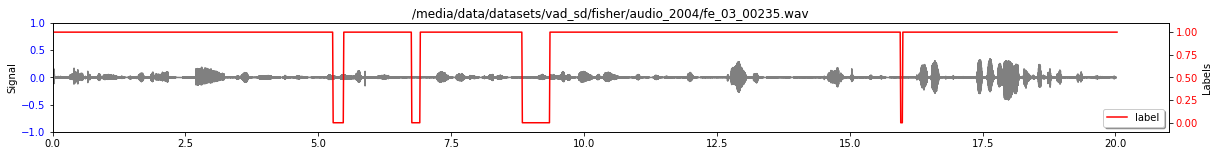

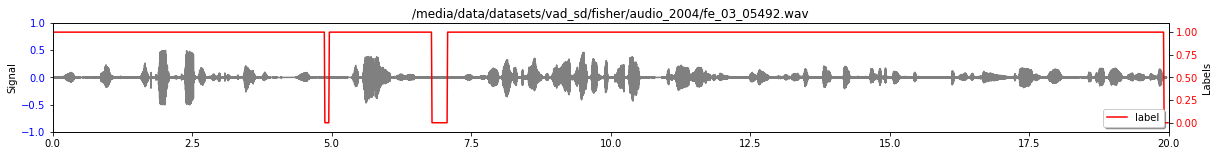

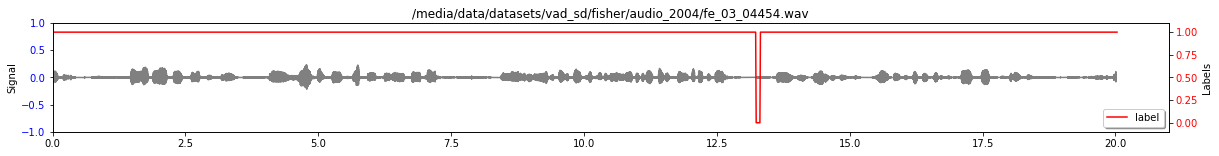

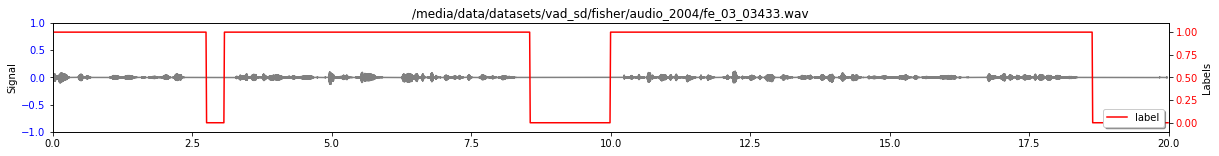

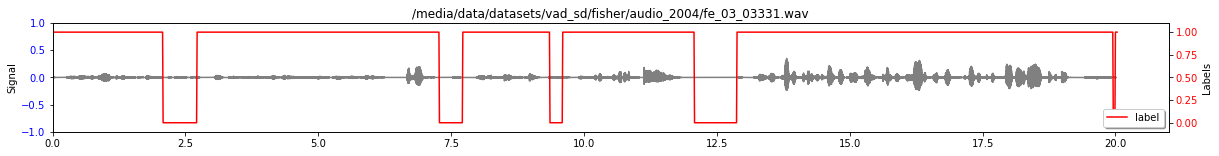

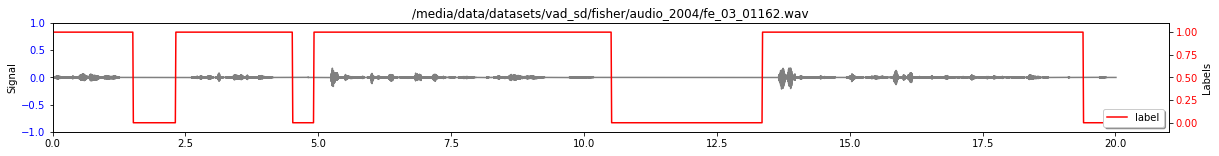

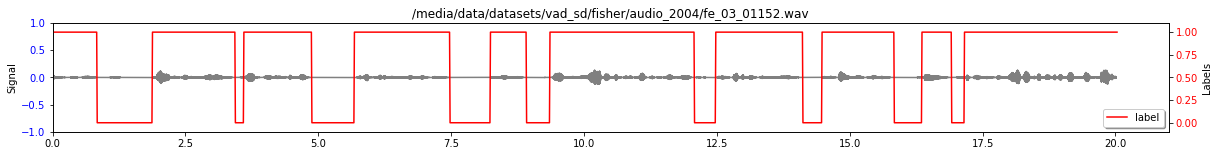

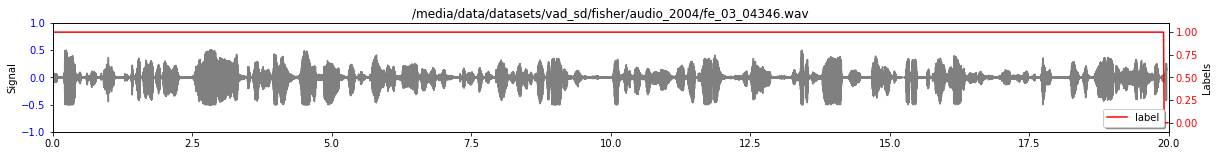

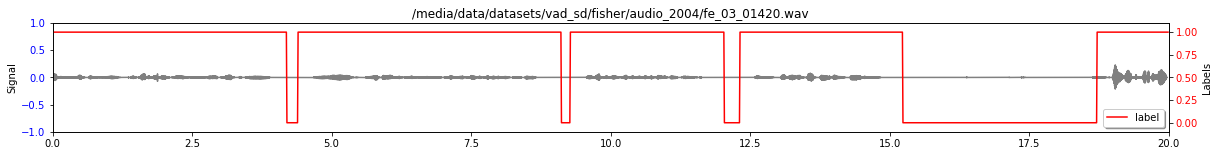

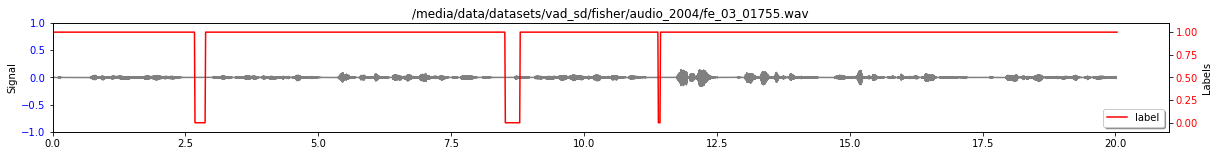

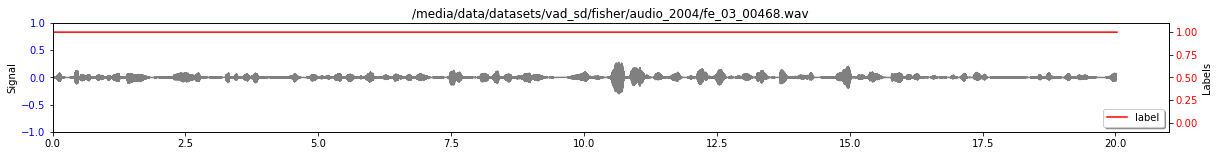

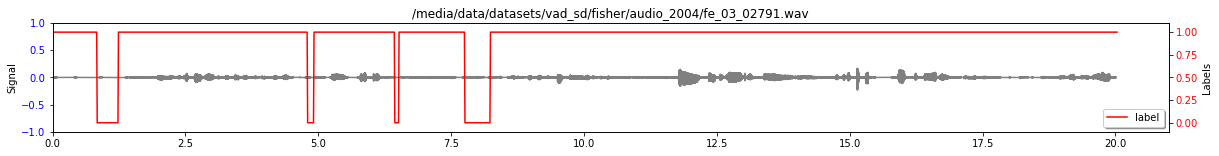

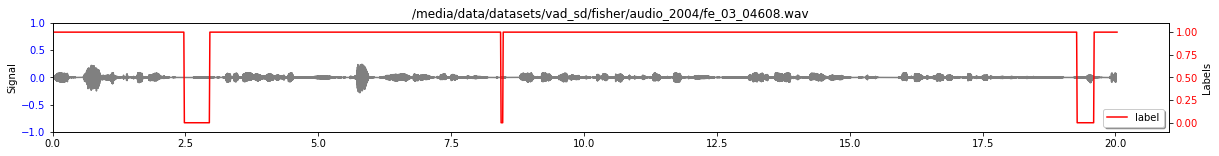

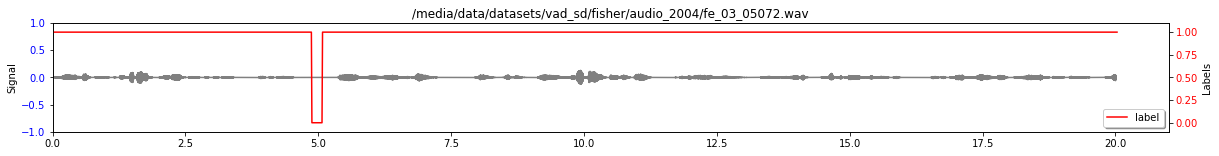

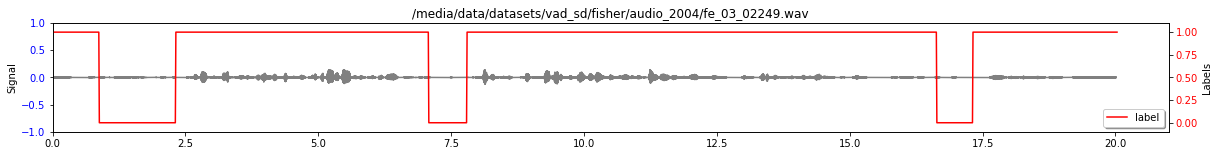

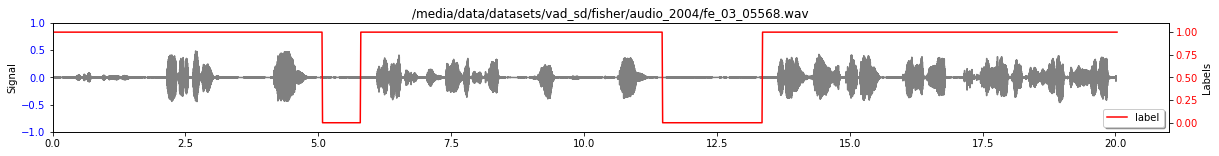

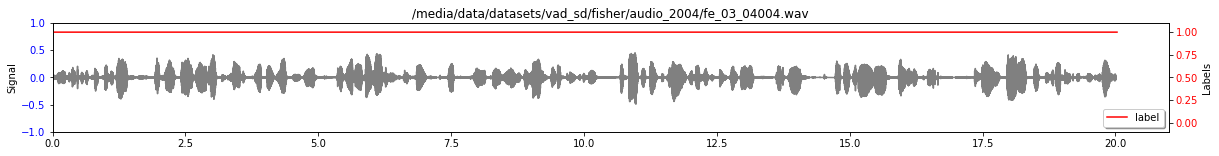

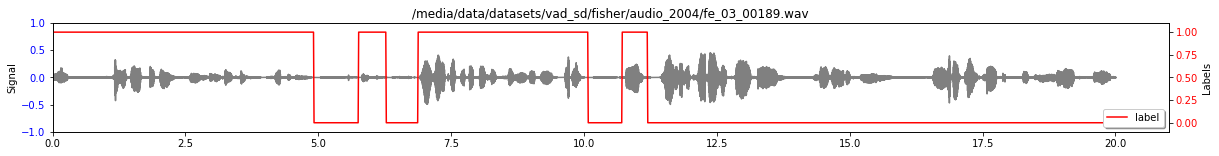

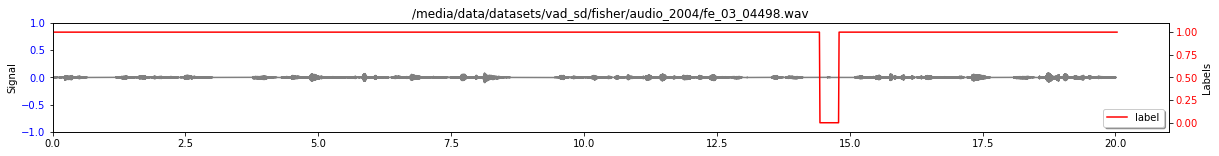

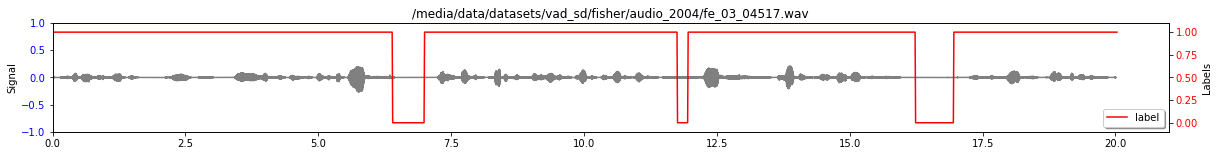

In [19]:
indices = np.random.permutation(len(fisher_data))
for idx in indices[:20]:
    plot_sample_from_manifest(fisher_data[idx], max_duration = 30, repeat = 4)

In [9]:
sample_path = "/media/data/datasets/vad_sd/fisher/audio_2004/"

'/media/data/datasets/vad_sd/fisher/audio_2004/fe_03_04159.wav'